In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [5]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

I want to work with the dates in the column `datatime` as datetime objects instead of plain text

In [6]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [8]:
col_datetime = air_quality.datetime
min_date = col_datetime.min()
max_date = col_datetime.max()
diff_days = max_date - min_date

min_date, max_date, diff_days

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'),
 Timedelta('44 days 23:00:00'))

I want to add a new column to the `DataFrame` containing only the month of the measurement

In [12]:
air_quality["month"] = air_quality.datetime.dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


What is the average $NO_2$ concentration for each day of the week for each of the measurement locations?

In [13]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Text(0, 0.5, '$NO_2 (ug/m^3)$')

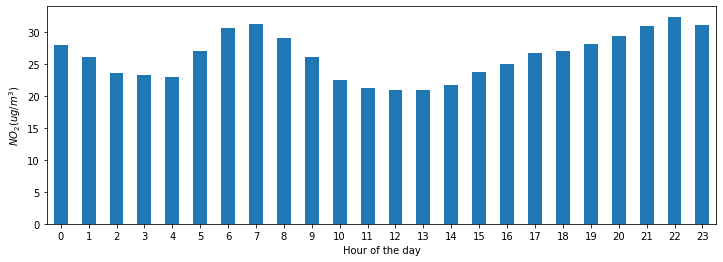

In [16]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind="bar", rot=0, ax=axs)
plt.xlabel("Hour of the day")
plt.ylabel("$NO_2 (ug/m^3)$")

## Datetime as index

In [17]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


Create a plot of the $NO_2$ values in the differents stations from the 20th of May till the end of 21st of May

<AxesSubplot:xlabel='datetime'>

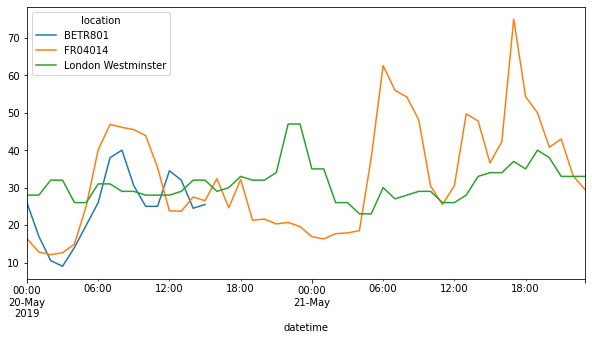

In [20]:
no_2["2019-05-20":"2019-05-21"].plot(figsize=(10, 5))

## Resample a time series to another frequency

Aggregate the current hourly time series values to the monthly maximum value in each of the stations.

In [19]:
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


> The `resample()` method is similar to a groupby operation:
> - it provides a time-based grouping, by using a string (e.g. M, 5H...) that defines the target frequency
> - it requires an aggregation function such as `mean`, `max`, ...

When defined, the frequency of the time series is provided by the `freq` attribute:

In [21]:
monthly_max.index.freq

<MonthEnd>

Make a plot of the daily mean $NO_2$ value in each of the stations

<AxesSubplot:xlabel='datetime'>

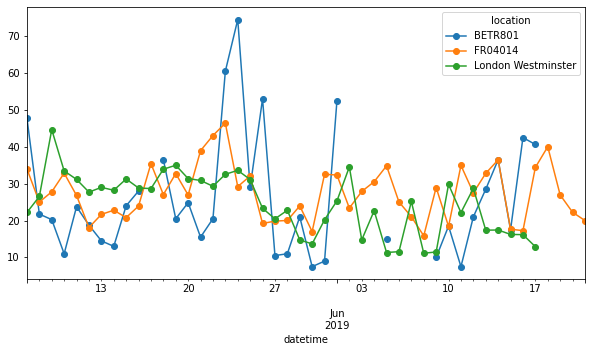

In [22]:
no_2.resample("D").mean().plot(style="o-", figsize=(10, 5))

**REMEMBER**

- Valid date string can be converted to datetime objects using `to_datetime` function or as part of read functions.
- Datetime objects in pandas support calculations, logical operations and covenient date-related properties using the `dt` accesor.
- A `DatetimeIndex` contains there date-related properties and supports convenient slicing.
- `Resample` is a powerful method to change the frequency of a time series.